In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


In [4]:
### import dataset
df = pd.read_csv('C:/Users/Administrator/Desktop/ML_Model/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
### inspect the dataset
df_copy=df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
## Spilt the terget variables and feature variables
X = df_copy.drop(columns = ['Outcome'] , axis=1)
y=df_copy['Outcome']

In [52]:
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [53]:
# Logistic Regression Model with sklearn
log_model = LogisticRegression().fit(X_train,y_train)
log_model

LogisticRegression()

In [19]:
# Fit the logistic regression model using statsmodels
X_const = sm.add_constant(X_train)
model = sm.Logit(y_train, X_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.2752
Time:                        00:04:55   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0359      0.837    -10.802      0.000     -10.675

In [20]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [21]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
..      ...        ...
355       1          1
534       0          0
344       0          0
296       1          0
462       0          0

[154 rows x 2 columns]


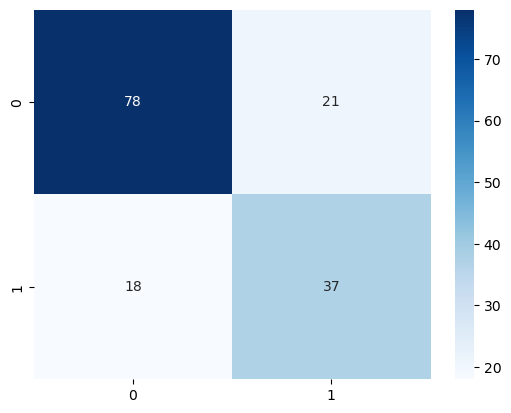

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.show()

In [41]:
# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1-Score: 0.6548672566371682


In [ ]:
###Accuracy measures the overall performance of the model. A higher accuracy means the model predicts most cases correctly.
###Precision focuses on the accuracy of the positive predictions. High precision means that when the model predicts a positive class, it is usually correct.
##Recall measures how well the model captures the actual positives.High recall means that the model correctly identifies most of the positive cases.
##The F1-score is useful when you need to balance precision and recall.A high F1-score means both precision and recall are reasonably high.

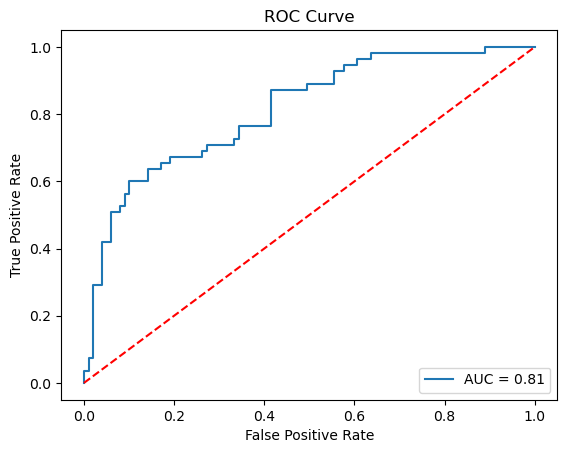

In [29]:
## ROC Curve
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
# AUC Score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")
##A model with an AUC closer to 1 indicates a better fit. An AUC of 0.5 indicates a model no better than random guessing.

AUC: 0.8124885215794306


In [ ]:
################ Key Diagnostic Tests for Logistic Regression: ##############

In [33]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)
##VIF values above 5-10 indicate high multicollinearity and might suggest that you should drop or combine some variables.

                    Feature        VIF
0                     const  37.490623
1               Pregnancies   1.450741
2                   Glucose   1.333802
3             BloodPressure   1.162375
4             SkinThickness   1.534159
5                   Insulin   1.452568
6                       BMI   1.277398
7  DiabetesPedigreeFunction   1.058426
8                       Age   1.620846


In [ ]:
###################### KNN Classification Model ###############################

In [65]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {'n_neighbors': np.arange(1, 30)}

# GridSearchCV to find the optimal K
knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Best value of K
print("Best K value:", knn_cv.best_params_)


Best K value: {'n_neighbors': 19}


In [86]:
# 5. Fit the KNN classifier model
knn_classifier = KNeighborsClassifier(n_neighbors=20)  # Set K=19 (You can tune this value)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [87]:
# 6. Make predictions
y_pred_test = knn_classifier.predict(X_test)
y_pred_test


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [88]:
# 7. Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[86, 13],
       [29, 26]], dtype=int64)

In [89]:
# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 0.4727272727272727
F1-Score: 0.5531914893617021


In [ ]:
########################### SVM ############################

In [98]:
from sklearn.svm import SVC  # For classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [92]:
# 4. Train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can use different kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
# 5. Make predictions
y_pred_svm = svm_classifier.predict(X_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [99]:
# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

In [106]:
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7532467532467533
Confusion Matrix:
[[80 19]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

